# 4-1: Datasets
- 원하는 데이터셋을 만드는 방법을 중심으로 작업
- Dataset을 쪼개서 사용 -> Minibatch

## Code.4-1-3: Dataset for Multi-class Classification

(8, 2) (8, 1)
(16, 2) (16, 1)
(24, 2) (24, 1)
(32, 2) (32, 1)
(40, 2) (40, 1)
X(shape/dtype/data): (40, 2) / <dtype: 'float32'> 
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(40, 2), dtype=float32, numpy=
array([[  1.8654757 ,  15.0574045 ],
       [  2.5625591 ,  13.2797365 ],
       [  3.2381573 ,  15.48744   ],
       [  3.9486861 ,  13.754726  ],
       [  1.6349089 ,  16.07495   ],
       [  1.5008798 ,  16.841185  ],
       [  1.7698059 ,  14.433611  ],
       [  3.3501692 ,  16.218409  ],
       [  6.654274  ,   6.062427  ],
       [  5.9893565 ,   6.20798   ],
       [  7.34242   ,   6.124387  ],
       [  5.915077  ,   6.445309  ],
       [  5.2874727 ,   6.2928476 ],
       [  4.9309773 ,   6.234832  ],
       [  4.901337  ,   7.15812   ],
       [  6.229378  ,   6.1485825 ],
       [ -2.248004  , -11.495452  ],
       [ -0.4060428 ,  -9.89374   ],
       [ -2.0482702 , -10.208726  ],
       [ -3.5263386 ,  -9.305565  ],
       [ -0.31700915,  -7.8918023 ],
    

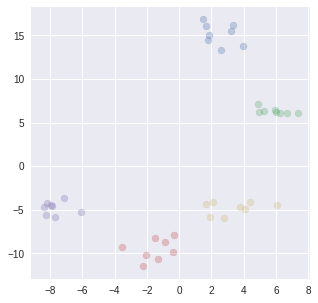

In [15]:
# one-hot vector
import tensorflow as tf

import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature = 8, 2
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0,1), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
  # print(class_idx)
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
  # print(center)
  # ax.scatter(center[0], center[1])

  x1 = center[0] + tf.random.normal(shape=(N,1))
  x2 = center[1] + tf.random.normal(shape=(N,1))

  # ax.scatter(x1.numpy(), x2.numpy())

  x = tf.concat((x1, x2), axis=1)
  y = class_idx*tf.ones(shape=(N,1), dtype=tf.int32)
  # print(x.shape, y.shape)

  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

  print(X.shape, Y.shape)

print(f"X(shape/dtype/data): {X.shape} / {X.dtype} \n {X.numpy}")
print(f"Y(shape/dtype/data): {Y.shape} / {Y.dtype} \n {Y.numpy}")

## Code.4-1-4: Dataset for Multi-class Classification with One-hot Encoding

(8, 2) (8,)
(16, 2) (16,)
(24, 2) (24,)
X(shape/dtype/data): (24, 2) / <dtype: 'float32'> 
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(24, 2), dtype=float32, numpy=
array([[  9.257736 , -12.350459 ],
       [  9.4926605, -14.159916 ],
       [ 10.91981  , -15.345842 ],
       [  8.972004 , -13.404624 ],
       [ 10.129067 , -16.933094 ],
       [  9.6203985, -14.488137 ],
       [  8.246199 , -13.52028  ],
       [  8.771754 , -14.84087  ],
       [ -6.02463  ,  12.336746 ],
       [ -8.649187 ,  11.473146 ],
       [ -8.549901 ,  10.996392 ],
       [ -6.486434 ,  13.060534 ],
       [ -6.972928 ,  11.393589 ],
       [ -6.3638353,  10.559794 ],
       [ -8.771652 ,   9.955722 ],
       [ -5.5799413,  11.99158  ],
       [ -7.6777153,   5.305892 ],
       [ -5.7882276,   4.0930743],
       [ -6.4741774,   5.089675 ],
       [ -5.2996273,   5.2536445],
       [ -5.6694107,   3.6377215],
       [ -6.2594337,   5.029003 ],
       [ -5.814186 ,   4.412496 ],
       [ -6.71

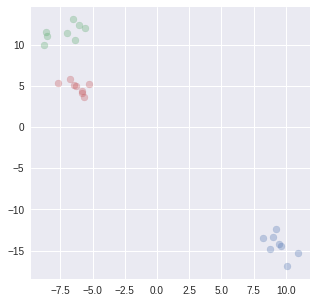

In [13]:
import tensorflow as tf

import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature = 8, 2
n_class = 3

X = tf.zeros(shape=(0, n_feature))
# matrix가 아닌 vector로 만들어주기 위해, 위 코드에 비해 (, 1)을 제거
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))

  x1 = center[0] + tf.random.normal(shape=(N,1))
  x2 = center[1] + tf.random.normal(shape=(N,1))

  x = tf.concat((x1, x2), axis=1)
  # matrix가 아닌 vector로 만들어주기 위해, 위 코드에 비해 (, 1)을 제거
  y = class_idx*tf.ones(shape=(N, ), dtype=tf.int32)


  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

  print(X.shape, Y.shape)

# onehot vector로 만드는 과정
Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)
print(f"X(shape/dtype/data): {X.shape} / {X.dtype} \n {X.numpy}")
print(f"Y(shape/dtype/data): {Y.shape} / {Y.dtype} \n {Y.numpy}")

## Code.4-1-5: Dataset Objects

In [19]:
import tensorflow as tf

N, n_feature = 100, 5
batch_size = 32

t_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias

# for batch_idx in range( N // batch_size):
#   x = X[batch_idx * batch_size : (batch_idx +1)*batch_size, ...]
#   y = Y[batch_idx * batch_size : (batch_idx + 1)*batch_size, ...]

#   print(x.shape, y.shape)

# dataset을 만드는 방법중 제일 간단한 방법
# x,y를 먼저 구한후, 아래 메서드 호출
# 단, slice가 작을때만 가능함(클 경우 부하 발생)
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size).shuffle(100)
# dataset = dataset.batch(batch_size)

for x, y in dataset:
  print(x.shape, y.shape)

(32, 5) (32,)
(32, 5) (32,)
(32, 5) (32,)
(4, 5) (4,)
